## Early Stage Diabete Prediction - Ensemble Methods

https://www.kaggle.com/datasets/ishandutta/early-stage-diabetes-risk-prediction-dataset

the art of data science

https://www.facebook.com/groups/1038628576726134

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [ ]:
url = 'https://raw.githubusercontent.com/brandynewanek/brandynewanek/main/diabetes_data_upload.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.shape

(520, 17)

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

** Observations**

+ all but age feature are category features.

## Univariate Analysis

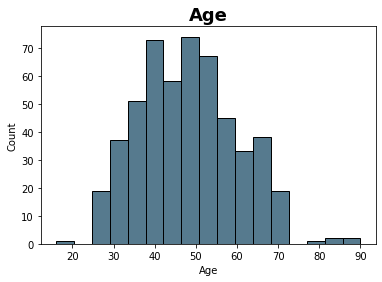

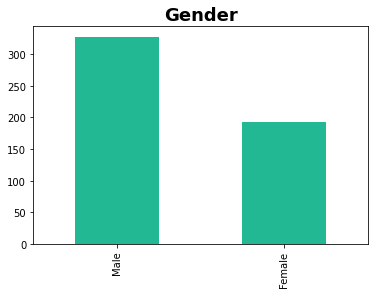

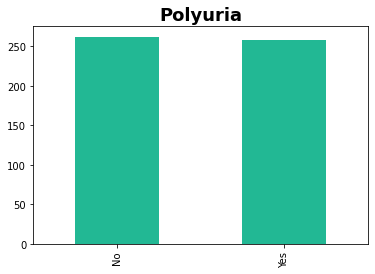

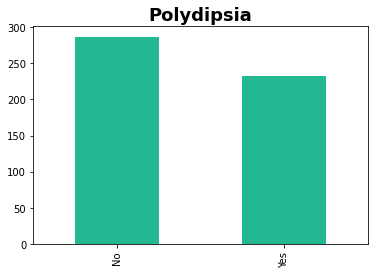

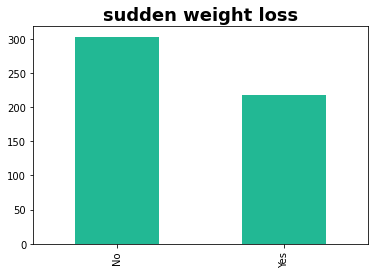

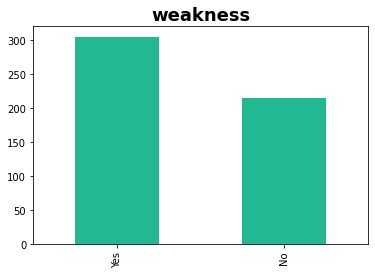

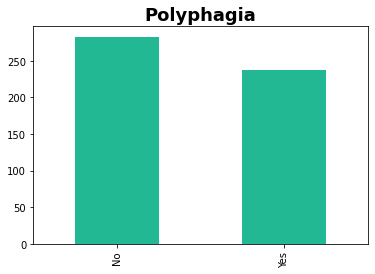

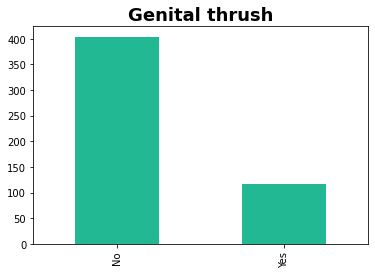

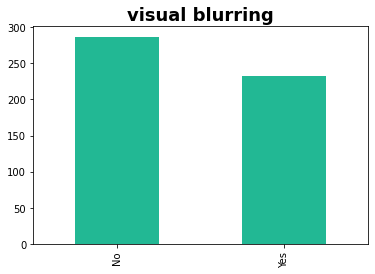

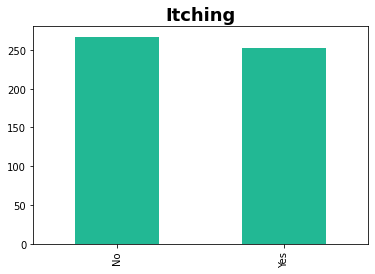

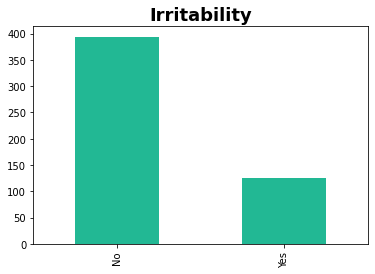

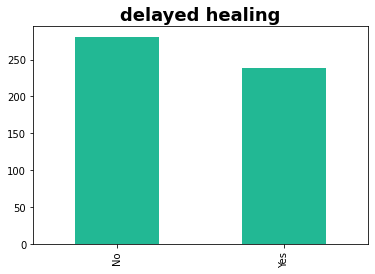

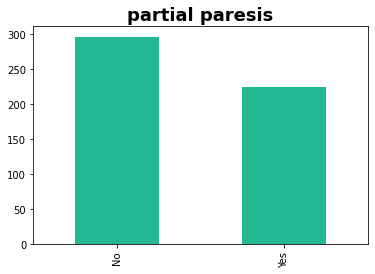

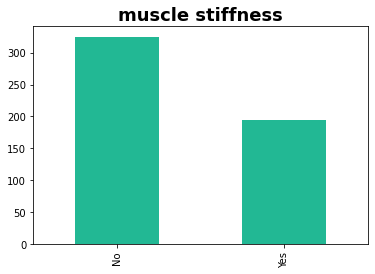

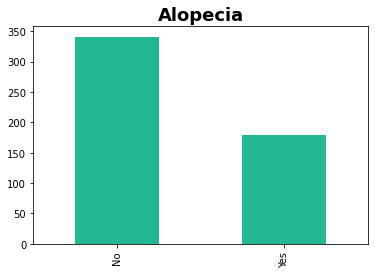

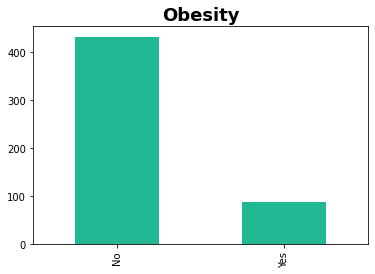

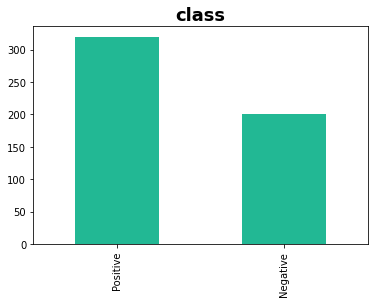

In [ ]:
for feat in df.columns:
  if df[feat].dtype == 'int':
    sns.histplot(data=df, x=feat, color='#1D4D69')
  else:
    df[feat].value_counts().plot(kind='bar', color='#22B894') 
  plt.title(feat, fontsize=18, fontweight='bold')
  plt.show()

**Observations**

+ Age - normal distribution  with outliers on both sides
+ Gender - imbalance category with more Males
+ Polyuria - balanced 2 categories
+ Polydipsia - slightly imabalanced 2 categories
+ suddent weight loss - slightly imabalanced 2 categories
+ weakness - slightly imabalanced 2 categories
+ Ployphangia - slightly imabalanced 2 categories
+ Genital thrush - very imabalanced 2 categories
+ visual blurring - slightly imabalanced 2 categories
+ Itching - balanced 2 categories
+ Irritability - very imbalanced 2 categories
+ delayed healing - balanced 2 categories
+ partial paresis - balanced 2 categories
+ muscle stiffness - moderate imbalance in 2 categories
+ Alopecia - moderate imbalance in 2 categories
+ Obesity - large imbalance in 2 categories

*target*
+ class - moderate imbalance in 2 target class.
 + positive most represented class


## Bivariate Analysis

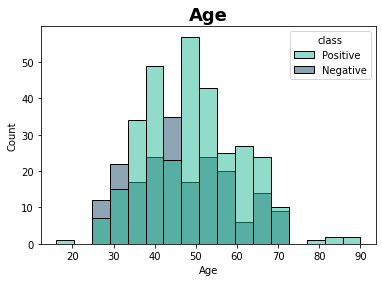

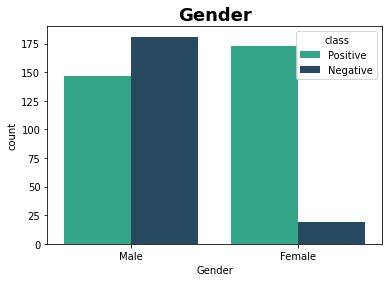

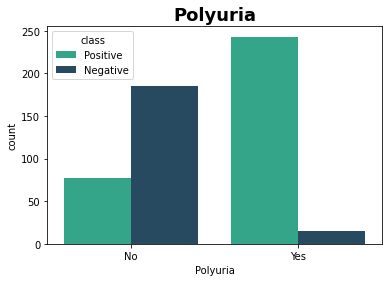

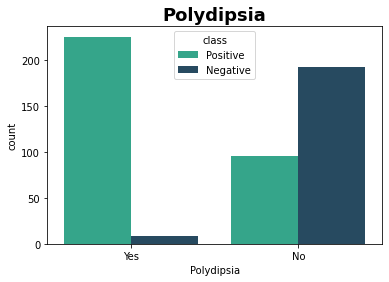

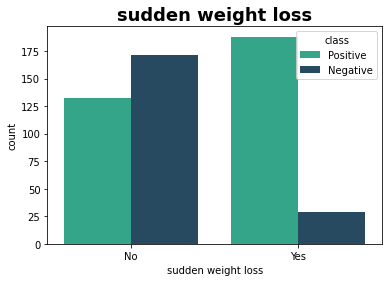

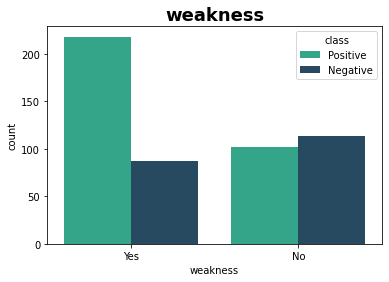

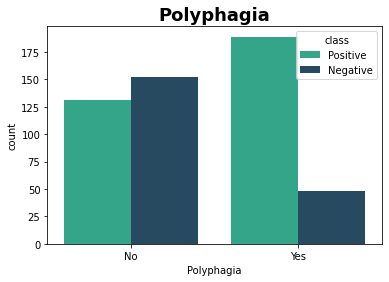

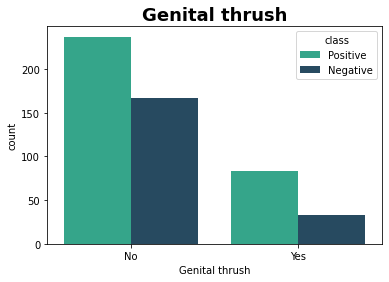

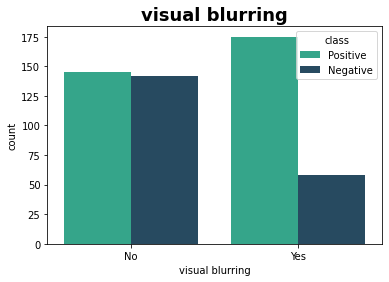

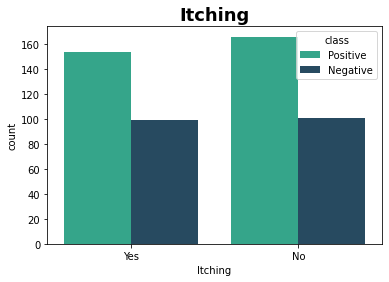

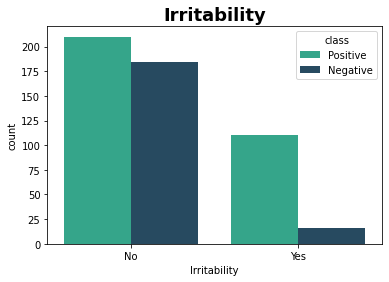

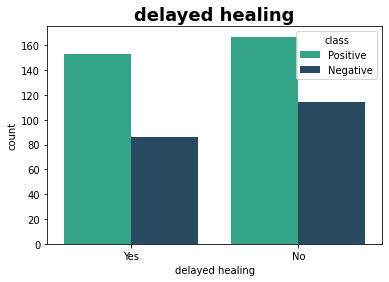

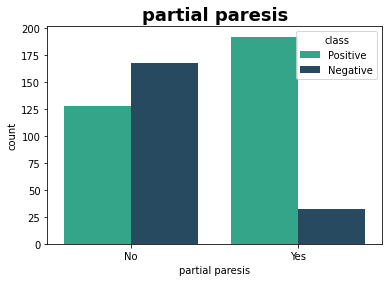

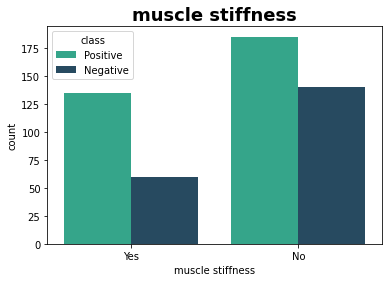

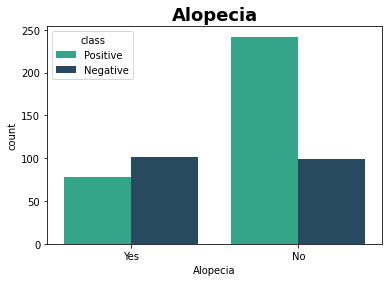

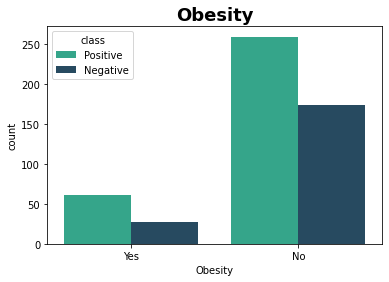

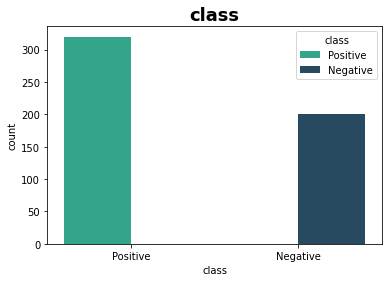

In [ ]:
for feat in df.columns:
  if df[feat].dtype == 'int':
    sns.histplot(data=df, x=feat, palette=['#22B894','#1D4D69'], hue='class')
  else:
    sns.countplot(data=df, x=feat, hue='class', palette=['#22B894','#1D4D69'] )
  plt.title(feat, fontsize=18, fontweight='bold')
  plt.show()

**Observations**

+ Gender - negative class is under represent for Females
+ Polyuria - negative class is under represent when Yes
+ Polydipsia - negative class is under represent when Yes
+ sudden weight loss - negative class is under represent when Yes
+ Polyphagia -  negative class is under represent when Yes
+ Genital thrush - moderate imbalance in target for both classes
+ visual blurring - high imbalance when Yes
+ Itching - slight imbalance for both classes
+ Irritability - high imbalance when Yes
+ delayed healing - moderate imbalance for both classes
+ partial paresis - high imbalance when Yes
+ musclue stiffness - moderate imbalance when Yes
+ Alopecia - large imbalance when No
+ Obesity - moderate imbalance for both classes

+ **class** moderate imbalance in target 

# Preprocessing

## inspecting null values

In [ ]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

## handling outliers

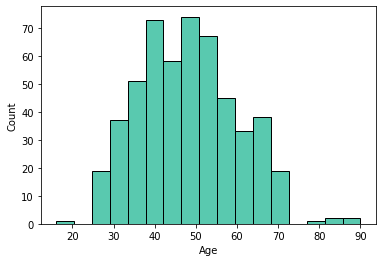

In [ ]:
sns.histplot(data=df, x='Age', color=['#22B894'])

In [ ]:
df['Age'] = df['Age'].clip(lower=24, upper=76)

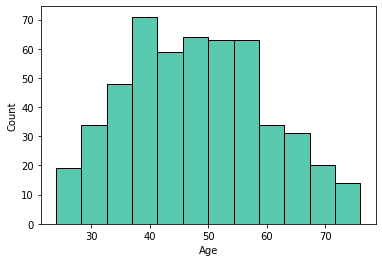

In [ ]:
sns.histplot(data=df, x='Age', color=['#22B894'])

## one hot encoding

In [ ]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
features_cat = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity',]

In [ ]:
df = pd.get_dummies(df, columns=features_cat)

In [ ]:
df.shape

(520, 32)

In [ ]:
df.head()

,Age,class,Gender_Female,Gender_Male,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,...,delayed healing_No,delayed healing_Yes,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes
0,40,Positive,0,1,1,0,0,1,1,0,...,0,1,1,0,0,1,0,1,0,1
1,58,Positive,0,1,1,0,1,0,1,0,...,1,0,0,1,1,0,0,1,1,0
2,41,Positive,0,1,0,1,1,0,1,0,...,0,1,1,0,0,1,0,1,1,0
3,45,Positive,0,1,1,0,1,0,0,1,...,0,1,1,0,1,0,1,0,1,0
4,60,Positive,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,0,1


# Modeling

## train test split

In [ ]:
df.columns

Index(['Age', 'class', 'Gender_Female', 'Gender_Male', 'Polyuria_No',
       'Polyuria_Yes', 'Polydipsia_No', 'Polydipsia_Yes',
       'sudden weight loss_No', 'sudden weight loss_Yes', 'weakness_No',
       'weakness_Yes', 'Polyphagia_No', 'Polyphagia_Yes', 'Genital thrush_No',
       'Genital thrush_Yes', 'visual blurring_No', 'visual blurring_Yes',
       'Itching_No', 'Itching_Yes', 'Irritability_No', 'Irritability_Yes',
       'delayed healing_No', 'delayed healing_Yes', 'partial paresis_No',
       'partial paresis_Yes', 'muscle stiffness_No', 'muscle stiffness_Yes',
       'Alopecia_No', 'Alopecia_Yes', 'Obesity_No', 'Obesity_Yes'],
      dtype='object')

In [ ]:
features = ['Age', 'Gender_Female', 'Gender_Male', 'Polyuria_No',
       'Polyuria_Yes', 'Polydipsia_No', 'Polydipsia_Yes',
       'sudden weight loss_No', 'sudden weight loss_Yes', 'weakness_No',
       'weakness_Yes', 'Polyphagia_No', 'Polyphagia_Yes', 'Genital thrush_No',
       'Genital thrush_Yes', 'visual blurring_No', 'visual blurring_Yes',
       'Itching_No', 'Itching_Yes', 'Irritability_No', 'Irritability_Yes',
       'delayed healing_No', 'delayed healing_Yes', 'partial paresis_No',
       'partial paresis_Yes', 'muscle stiffness_No', 'muscle stiffness_Yes',
       'Alopecia_No', 'Alopecia_Yes', 'Obesity_No', 'Obesity_Yes']
target = ['class']

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.3)

## standardize + pca

In [ ]:
std_scaler = StandardScaler().fit(X_tr, y_tr)
X_tr = std_scaler.transform(X_tr)
X_ts = std_scaler.transform(X_ts)

In [ ]:
pca = PCA().fit(X_tr, y_tr)
X_tr = pca.transform(X_tr)
X_ts = pca.transform(X_ts)

## model_factory

In [ ]:
def model_factory(X_tr=X_tr, X_ts=X_ts, y_tr=y_tr, y_ts=y_ts, model=None):
  model.fit(X_tr, y_tr)
  score_tr = model.score(X_tr, y_tr)
  score_ts = model.score(X_ts, y_ts)

  return model, score_tr, score_ts


## RandomForest

In [ ]:
rf = RandomForestClassifier()
rf, score_tr_rf, score_ts_rf = model_factory(model=rf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


## bagging classifier

In [ ]:
bag = BaggingClassifier()
bag, score_tr_bag, score_ts_bag = model_factory(model=bag)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## adaboosting

In [ ]:
ada = AdaBoostClassifier()
ada, score_tr_ada, score_ts_ada = model_factory(model=ada)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## gradient boosting

In [ ]:
gbc = GradientBoostingClassifier()
gbc, score_tr_gbc, score_ts_gbc = model_factory(model=gbc)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## score summary

In [ ]:
tr_scores = [score_tr_rf, score_tr_bag, score_tr_ada, score_tr_gbc]
ts_scores = [score_ts_rf, score_ts_bag, score_ts_ada, score_ts_gbc]
models = ['randforest', 'bagging', 'adaboost', 'gradientboost']
dict_scores = {
    'train_score':tr_scores,
    'test_score':ts_scores
}
pd.DataFrame(dict_scores, index=models)

,train_score,test_score
randforest,1.000000,0.961538
bagging,0.997253,0.967949
adaboost,1.000000,0.942308
gradientboost,1.000000,0.961538
